<a href="https://colab.research.google.com/github/tozanni/Deep_Learning_Notebooks/blob/main/Feed_Forward_ANN_Paso_a_Paso_con_Numpy_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed-foward ANN *realmente* paso a paso con NumPy

Eduardo H. Ramirez, PhD [LinkedIn](https://www.linkedin.com/in/ehramirez/)
[Twitter](https://twitter.com/eduhrami)
[Github](https://github.com/tozanni)


# Parte 1. Arquitectura y *forward pass*.

El objetivo de este cuaderno es demostrar las operaciones matemáticas de las redes feed-forward de la forma más clara y directa posible. Espero que puedas leer este cuaderno paso a paso de arriba a abajo, revisando y digiriendo el resultado intermedio de cada operación. Por lo cual he evitado al mínimo posible el uso de librerías, clases y funciones.

He visto muchos ejemplos y artículos donde se escriben redes "from scratch". Por lo general terminan reinventando su propio framework con una buena cantidad de funciones. Al hacer esto volvemos al punto de partida ya que tenemos que que entender la estructura del código, renombrar variables en nuestra mente al entrar a una función, brincar de una función a otra o de una clase a otra. Todo esto va en contra de mi objetivo inicial que es exponer las operaciones de las redes neuronales de forma directa y con el menor número de distracciones.

Por la razón anterior mi objetivo **NO es** escribir un framework, y debido a ello muchas secciones de este cuaderno pueden ser repetitivas y poco flexibles, pero espero que estos inconvenientes se compensen en la claridad.

In [ ]:
import numpy as np
from sklearn import datasets
np.random.seed(42)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

## Dataset

Utilizaremos el dataset Iris, es un dataset tabular con 4 features cuyo objetivo es clasificar flores en familias dadas algunas características de sus pétalos y sépalos.

In [ ]:
iris = datasets.load_iris()
X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

Los atributos de cada registros son la longitud de los sépalos, ancho de los sépalos, longitud de los pétalos y ancho de los pétalos de la flor en centrímetros.

In [ ]:
# Imprimir el primer valor del dataset
X[0]

array([1.0913, 0.2378, -0.8825, -1.5226])

Es una buena práctica normalizar o estandarizar los datos de input antes de procesarlos por una red neuronal, esto asegura que todos los features tengan el mismo orden de magnitud y facilita el entrenamiento más delante.

Para estandarizar el dataset simplemente hay que restar la media y dividir por la desviación estándar.

In [ ]:
X = (X - np.mean(X)) / np.std(X)

# El primer valor de nuestro dataset, estandarizado
X[0]

array([1.0913, 0.2378, -0.8825, -1.5226])

Las clases Y representan el tipo de flor que deseamos aprender a clasificar siendo 0: Iris-Setosa, 1: Iris-Versicolor y 2: Iris-Virginica.  Sin embargo, para simplificar el problema vamos a tomar únicamente los 100 primeros datos y tratar este problema como uno de **clasificación binaria**.

A continuación podrás ver las etiquetas del subset del dataset que utilizaremos.

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Inputs

A partir de nuestro dataset X, crearemos un minibatch. El minibatch representa la cantidad de renglones del input que nuestra red procesará simultáneamente en tiempo de inferencia o de entrenamiento.

Poder procesar varios inputs simultáneamente es una ventaja adicional de las ANN vs. otros métodos de aprendizaje automático.

En este caso utilizamos un minibatch de tamaño 2, pero este valor puede cambiarse arbitrariamente.

In [ ]:
# Leemos las dos primeras instancias del dataset Iris

x = X[:2]
x

array([[1.0913, 0.2378, -0.8825, -1.5226],
       [0.9846, -0.0289, -0.8825, -1.5226]])

In [ ]:
x.shape

(2, 4)

## Arquitectura de la red

Vamos a crear una red de perceptrón multicapa o red densa, con 2 capas ocultas, una de 5 unidades y una de 4 unidades. El tamaño de las capas ocultas es una decisión del diseñador de la red, por lo cual queda completamente a nuestro criterio.

Por otro lado, el tamaño de la capa de input depende de la cantidad de features que tienen nuestros dataset, en este caso requerimos 4 unidades.

La capa de salida depende de la tarea que vamos a resolver, en este caso una clasificación binaria, por lo cual requerimos una única unidad y su activación será la función *sigmoidal*.

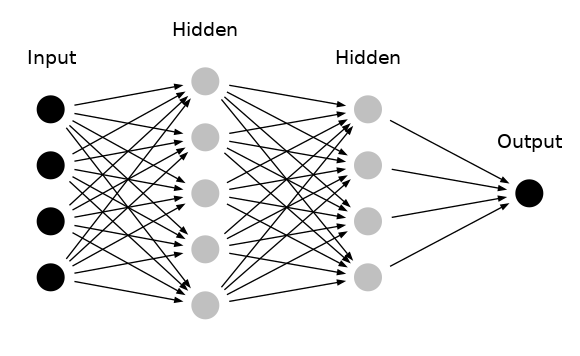

Diagrama generado con [Dotnets + Graphviz](https://github.com/martisak/dotnets)

### Capa oculta 1

El elemento más importante de cada capa oculta es su matriz de pesos.

La matriz de pesos tiene renglones de acuerdo a la cantidad de features del input y tantas columnas como nodos.

Es decir, 4 elementos x 5 nodos de la capa hidden, seran 20 parámetros o pesos para la primera capa.


In [ ]:
W_1 = np.random.rand(x.shape[1], 5)
W_1

array([[0.3745, 0.9507, 0.7320, 0.5987, 0.1560],
       [0.1560, 0.0581, 0.8662, 0.6011, 0.7081],
       [0.0206, 0.9699, 0.8324, 0.2123, 0.1818],
       [0.1834, 0.3042, 0.5248, 0.4319, 0.2912]])

In [ ]:
W_1.shape

(4, 5)

Aqui multiplicamos el minibatch por la matriz de pesos de la primera capa.

Cada renglón del resultado corresponde con cada elemento del minibatch.

Como ejercicio puedes probar a modificar el tamaño del minibatch y verás cómo se modifica el resultado de esta operación.

In [ ]:
h1 = x@W_1
h1

array([[0.1484, -0.2678, -0.5288, -0.0488, -0.2652],
       [0.0668, -0.3847, -0.8379, -0.2730, -0.4708]])

#### Activacion de las capas ocultas (ReLU)

Aplicamos la funcion ReLU, que simplemente toma el maximo entre cero y el valor obtenido


In [ ]:
a1 = np.maximum(h1,0)
a1

array([[0.1484, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0668, 0.0000, 0.0000, 0.0000, 0.0000]])

In [ ]:
a1.shape

(2, 5)

### Capa oculta 2

El input a la capa 2 es el resultado de la activacion de la capa 1, es decir nuestra variable a<sub>1</sub>.

Para la segunda capa tenemos 5 features, que son las columnas de a<sub>1</sub> x 4 unidades = 20 parámetros.


In [ ]:
W_2 = np.random.rand(a1.shape[1], 4 )
W_2

array([[0.3745, 0.9507, 0.7320, 0.5987, 0.1560],
       [0.1560, 0.0581, 0.8662, 0.6011, 0.7081],
       [0.0206, 0.9699, 0.8324, 0.2123, 0.1818],
       [0.1834, 0.3042, 0.5248, 0.4319, 0.2912]])

In [ ]:
h2 = a1@W_2
h2

array([[0.0908, 0.0207, 0.0434, 0.0544],
       [0.0409, 0.0093, 0.0195, 0.0245]])

Nuevamente aplicamos la función de activación ReLU, esta operación no modifica las dimensiones del input que estamos procesando en este paso.

In [ ]:
# Ojo, la funcion np.max no es element-wise, hay que usar maximum
a2 = np.maximum(h2,0)
a2

array([[0.0908, 0.0207, 0.0434, 0.0544],
       [0.0409, 0.0093, 0.0195, 0.0245]])

### Capa de salida

La capa de salida tiene 1 unidad.

La salida de la capa previa a<sub>2</sub> tiene 4 features, entonces la matriz de pesos de la capa de salida tiene 4x1 = 4 parámetros.

In [ ]:
W_3 = np.random.rand(a2.shape[1], 1)
W_3

array([[0.1220],
       [0.4952],
       [0.0344],
       [0.9093]])

Calculamos el valor de las neuronas de salida antes de la capa 3.

Esta es equivalente a la capa "Linear" y para algunos problemas es una forma correcta de terminar el output final de la red.

In [ ]:
h3 = a2@W_3
h3

array([[0.0723],
       [0.0326]])

A continuación puedes ver la operación anterior expresada de forma compacta como una *composición de funciones*, que es una multiplicación sucesiva del input por sus pesos con una función no-lineal entre cada una de las operaciones. Como puedes ver, las variables h<sub>1</sub>, h<sub>2</sub> y a<sub>1</sub>, a<sub>2</sub> no son realmente necesarias para la implementación, sino que se agregan con fines didácticos.

In [ ]:
np.maximum(np.maximum(x@W_1,0)@W_2,0)@W_3

array([[0.0723],
       [0.0326]])

#### Activación de la última capa (Sigmoidal)

En este caso, ya que deseamos implementar una red neuronal para clasificación binaria, calcularemos la función [sigmoide o sigmoidal](https://en.wikipedia.org/wiki/Sigmoid_function). Recordemos que la activación de la última capa está determinada por la tarea que vamos a resolver en la red.

La función sigmoidal es comúnmente utilizada en clasificación binaria ya que su salida siempre es un número real entre cero y uno, por lo cual puede utilizarse para representar probabilidades.

Entonces, el resultado de la función sigmoidal representará la probabilidad de que nuestro input (x<sub>i</sub>) pertenezca a la clase 1, de tal forma que si el resultado es menor a 0.5 elegiremos la clase cero y si es mayor o igual a 0.5, elegiremos la clase 1.

In [ ]:
output = 1/(1 + np.exp(-h3))
output

array([[0.5181],
       [0.5081]])

En este caso, aunque estamos cerca del límite ambos ejemplos seran clasificados como parte de la clase 1.

Recordar que esta red no ha sido entrenada, entonces el resultado es completamente arbitrario.

In [ ]:
output >= 0.5

array([[ True],
       [ True]])

## Resumen del forward pass

Finalmente podemos expresar **todo** el forward pass de la red de la siguiente forma en las siguientes 2 líneas. Toma nota de ellas, ya que en los siguientes pasos utilizaremos esta notación compacta.

Dejo comentadas las inicializaciones de los parámetros para que puedas comprobar el resultado anterior paso a paso es igual que el resultado de estas dos líneas.

In [ ]:
#Obtener datos
#x = X[:2]

#Inicializar arreglos de parametros con valores aleatorios
#W_1 = np.random.rand(x.shape[1], 5)
#W_2 = np.random.rand(a1.shape[1], 4 )
#W_3 = np.random.rand(a2.shape[1], 3)

# Forward pass, ejecutamos las 2 capas ocultas ReLU y la capa de salida lineal
h3 = np.maximum(np.maximum(x@W_1,0)@W_2,0)@W_3

# Función de activación softmax para la última capa
output = 1/(1 + np.exp(-h3))
output

array([[0.5181],
       [0.5081]])